<a href="https://colab.research.google.com/github/niazangels/approaching-almost/blob/main/00_supervised_and_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets, manifold

In [ ]:
pixel_values, targets = datasets.fetch_openml(
    'mnist_784', version=1, return_X_y=True
)

In [ ]:
pixel_values.shape, targets.shape

((70000, 784), (70000,))

In [ ]:
targets.dtype

dtype('O')

In [ ]:
targets[:5]

array(['5', '0', '4', '1', '9'], dtype=object)

In [ ]:
targets = targets.astype(int)

In [ ]:
targets[:5]

array([5, 0, 4, 1, 9])

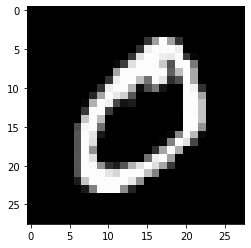

In [ ]:
single_image = pixel_values[1, :].reshape(28,28)
plt.imshow(single_image, cmap='gray')

In [ ]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000])

In [ ]:
transformed_data.shape

(3000, 2)

In [ ]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns = "x y targets".split()
)

In [ ]:
tsne_df.head()

,x,y,targets
0,-5.281551,-28.952768,5.0
1,-26.105896,-68.069321,0.0
2,-42.503582,35.580391,4.0
3,38.893967,26.663395,1.0
4,-14.770573,35.433247,9.0


In [ ]:
tsne_df['targets'] = tsne_df['targets'].astype(int)
tsne_df.head()

,x,y,targets
0,-5.281551,-28.952768,5
1,-26.105896,-68.069321,0
2,-42.503582,35.580391,4
3,38.893967,26.663395,1
4,-14.770573,35.433247,9


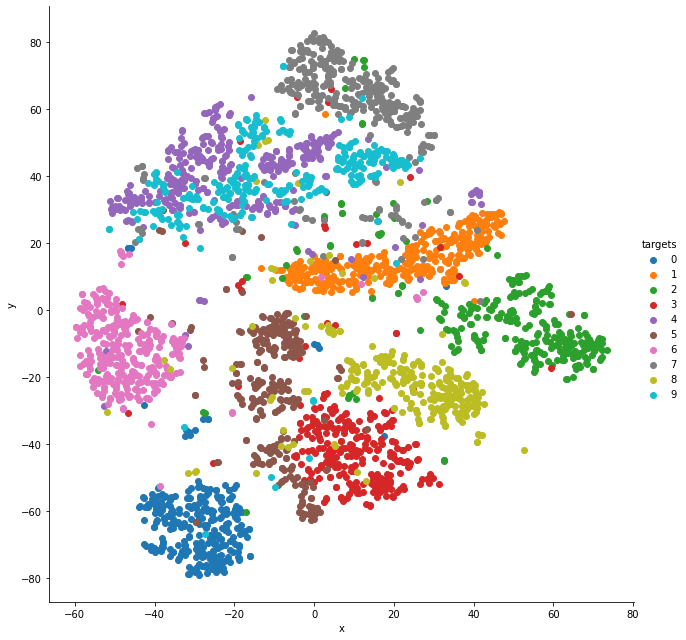

In [ ]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=9)
grid.map(plt.scatter, "x", "y").add_legend()

# Cross Validation

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
quality_mapping = dict(zip(sorted(df['quality'].unique()), range(6)))
quality_mapping

{3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}

In [ ]:
df["quality"] = df["quality"].map(quality_mapping)
df["quality"]

0       2
1       2
2       2
3       3
4       2
       ..
1594    2
1595    3
1596    3
1597    2
1598    3
Name: quality, Length: 1599, dtype: int64